An analysis aimed at understanding drivers behind our education platform customer behaviours. a use of dicision tree algorithm to extract information about the relationship between attribute (or features) of individual customers and our target output variable.

In [ ]:
# importing neccessary packages
import pandas as pd
import numpy as np
from datetime import date,datetime
import matplotlib.pyplot as plt

In [5]:
# importing dataset
df=pd.read_csv('/content/drive/MyDrive/Datasets/Datasetnexustech Education_ Customer_Data_Details .csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Return the first five number of rows.
df.head()

,Submitted,First Name,Last Name,Email Address,Gender,Marital Status,Converted,Location,Postal Address,Employment Status,...,Programme of Interest,Level of IT Experience,What is your main motivation for enrolling in the programme?,What are the challenges you've experienced while trying to meet the above stated goal(s)?,What can we do to help you overcome these challenges?,Employment Preferences,Monthly Salary Expectations (in Naira),What is your short term (2 years) career goal?,What is your mid-term (2 - 5 years) career goal?,What is your long term (5+ years) career goal?
0,12/05/2022 15:06,Miracle,Obiekwe,miracleobiekwe@yahoo.com,Male,Single,NO,Enugu State,<p>Nigeria prisons barracks enugu state comman...,Self employed / Business Owner,...,Data Science,Intermediate ( 2 - 5 years ),<p>That I can do all things through Christ tha...,<p>Coding is my challenge.. I have tried it be...,<p>I need maximum attention and guidance</p>\n,Foreign Employment,2.5million,<p>To be a consultant in the field of data sci...,<p>Empowering children from the street to stud...,<p>To be the best across the globe</p>\n
1,06/04/2022 20:41,Ibilola,Shobanke,lolashobanke@gmail.com,Female,Married,NO,Oyo State,"<p>3 Fafunlayo Layout, Iwo Road, Ibadan </p>\n",Employed,...,Data Analytics,Beginner ( 0 - 2 years ),<p>For self development and to increase my cha...,<p>N/A</p>\n,<p>N/A</p>\n,Foreign Employment,"N2,000,000",<p>Becoming a genius in data analytics and hav...,<p>To become diverse in the other aspects of t...,NaN
2,06/04/2022 12:22,Damilola,Oseni,dammygeorge5050@gmail.com,Female,Married,YES,FCT,"<p>1 EMMANUEL NTUK, GOSHEN VILLA ESTATE, LUGBE...",Employed,...,Data Analytics,Beginner ( 0 - 2 years ),<p>Knowledge </p>\n,<p>Fear of failing<br />\nBudget<br />\nLack o...,<p>Give Feedbacks on how I can improve</p>\n,Local Employment,"100,000",<p>Successful implementation of what I have le...,<p>To work in an organization</p>\n,NaN
3,06/04/2022 09:30,Kabir,Salawudeen,salawudeenkabeer@gmail.com,Male,Married,NO,FCT,"<p>23, Angwar Siyawa Abuja Nigeria</p>\n",Employed,...,Full-Stack Software Development,Advanced ( 5 years and above ),<p>One of your student got a good and well pay...,<p>Network challenges and at times work relate...,<p>If I can have a full knowledge in becoming ...,Foreign Employment,"300,000.00",<p>1.Earn a new certificate or degree.<br />\n...,<p>Start a personal project.</p>\n,<p>1. Get familiar with new technology.<br />\...
4,05/04/2022 14:40,Bashir,Hussain,uniquebash@gmail.com,Male,Married,NO,FCT,"<p>Plot 785 Herbert Macaulay Way, CBD Abuja</p>\n",Employed,...,Data Analytics,Advanced ( 5 years and above ),<p>To start a career path on technology </p>\n,<p>Interest </p>\n,<p>Enrolment </p>\n,Foreign Employment,"500,000.00",<p>To obtain basic certification on technology...,<p>To obtain multiple certifications on techno...,<p>To be a reference point in technology </p>\n


In [7]:
# returns the list of column names in the dataset
df.columns

Index(['Submitted', 'First Name', 'Last Name', 'Email Address', 'Gender',
       'Marital Status', 'Converted', 'Location', 'Postal Address',
       'Employment Status', 'Personal Interests',
       'What Social Media do you use?',
       'What is your primary objective/goal for enrolling in this programme?',
       'What is your secondary objective/goal for enrolling in this programme?',
       'What can we do to help you achieve the above stated goal(s)?',
       'How you determine the achievement of above stated goal(s)?',
       'Phone Number', 'Date of Birth', 'Education', 'Profession',
       'Programme of Interest', 'Level of IT Experience',
       'What is your main motivation for enrolling in the programme?',
       'What are the challenges you've experienced while trying to meet the above stated goal(s)?',
       'What can we do to help you overcome these challenges?',
       'Employment Preferences', 'Monthly Salary Expectations (in Naira)',
       'What is your short term (

In [8]:
df.shape

(24, 30)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 30 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Submitted                                                                                  24 non-null     object 
 1   First Name                                                                                 24 non-null     object 
 2   Last Name                                                                                  24 non-null     object 
 3   Email Address                                                                              24 non-null     object 
 4   Gender                                                                                     24 non-null     object 
 5   Marital Status                                      

In [10]:
df.isnull().sum()

Submitted                                                                                    0
First Name                                                                                   0
Last Name                                                                                    0
Email Address                                                                                0
Gender                                                                                       0
Marital Status                                                                               0
Converted                                                                                    0
Location                                                                                     0
Postal Address                                                                               8
Employment Status                                                                            0
Personal Interests                                

In [21]:
# Use df.columns command to drop columns via indexing
df2 = df.drop(df.columns[[0,3,8,9,11,12,13,14,15,16,22,23,24,25,26,27,28,29,]], axis=1)

In [22]:
df2.columns

Index(['First Name', 'Last Name', 'Gender', 'Marital Status', 'Converted',
       'Location', 'Personal Interests', 'Date of Birth', 'Education',
       'Profession', 'Programme of Interest', 'Level of IT Experience'],
      dtype='object')

In [23]:
# filling missing values in the converted column
df2['Converted'] = df2['Converted'].replace(np.NaN, 'No') 

In [24]:
# filling missing values in the converted column
df2['Converted'] = df2['Converted'].replace(np.NaN, 'No') 

In [26]:
df2['Personal Interests'] = df2['Personal Interests'].str.replace(r'</p>|<p>|\n', '',regex = True)

In [27]:
df2['Education'] = df2['Education'].replace('Bachelor&#039;s Degree', 'Bachelors')

In [29]:

 
def age(born):
    born = datetime.strptime(born, "%y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
df2['Age'] = df2['Date of Birth'].apply(age)
  
# display(df2)

ValueError: ignored

In [ ]:
df2.isnull().sum()

First Name                                0
Last Name                                 0
Gender                                    0
Marital Status                            0
Converted                                 0
Sponsored/Self Sponsored                  9
Employment Status                         0
Personal Interests                        0
Date of Birth                             0
Education                                 0
Profession                                1
Programme of Interest                     0
Employment Preferences                    4
Monthly Salary Expectations (in Naira)    4
Age                                       0
dtype: int64

In [ ]:
df2.head(20)

,First Name,Last Name,Gender,Marital Status,Converted,Sponsored/Self Sponsored,Employment Status,Personal Interests,Date of Birth,Education,Profession,Programme of Interest,Employment Preferences,Monthly Salary Expectations (in Naira),Age
0,Miracle,Obiekwe,Male,Single,NO,NaN,Self employed / Business Owner,Data science,1995-06-22,Bachelors,Computer science,Data Science,Foreign Employment,2.5million,26
1,Ibilola,Shobanke,Female,Married,NO,NaN,Employed,"Technology, Business",1984-07-09,Masters,Lecturing,Data Analytics,Foreign Employment,"N2,000,000",37
2,Damilola,Oseni,Female,Married,NO,NaN,Employed,Business,1990-08-21,Bachelors,Biochemist,Data Analytics,Local Employment,"100,000",31
3,Kabir,Salawudeen,Male,Married,NO,NaN,Employed,Technology,1990-01-01,HND,Computer Science,Full-Stack Software Development,Foreign Employment,"300,000.00",32
4,Bashir,Hussain,Male,Married,NO,NaN,Employed,"Technology, Sports and Travels",1980-05-14,Bachelors,Banking,Data Analytics,Foreign Employment,"500,000.00",42
5,Adekunle,Olusanya,Male,Married,Yes,Self Sponsored,Employed,"Business Governance, Technology",1978-05-01,Bachelors,Project Manager/ IT Audit,Data Science,Foreign Employment,N2000000,44
6,Idowu,Ismail,Male,Single,NO,NaN,Unemployed,Travel,1997-07-07,NCE,Engineering,Full-Stack Software Development,Foreign Employment,"5,000,000 Naira",24
7,Toyyibat,Abdulkareem,Female,Married,NO,NaN,Employed,Tech Savy,1995-10-21,Bachelors,Software engineer,Full-Stack Software Development,Remote Employment,"800,000",26
8,Tolulope,Obatusin,Male,Married,NO,NaN,Employed,Technology,1983-02-02,Masters,Clinical Administrator,Data Science,Foreign Employment,"N1, 500.000",39
9,Olubusayo,Ikotun,Female,Single,NO,NaN,Self employed / Business Owner,"Law, Reading and Technology",1996-02-01,Bachelors,Lawyer,Data Science,Remote Employment,1 million naira,26


\

In [ ]:
## Encoding the converted column

In [ ]:
df2.Converted.unique()

array(['NO', 'Yes'], dtype=object)

In [ ]:
df2['Conversion'] = df2['Converted'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df2.head(5)

,First Name,Last Name,Gender,Marital Status,Converted,Sponsored/Self Sponsored,Employment Status,Personal Interests,Date of Birth,Education,Profession,Programme of Interest,Employment Preferences,Monthly Salary Expectations (in Naira),Age,Conversion
0,Miracle,Obiekwe,Male,Single,NO,NaN,Self employed / Business Owner,Data science,1995-06-22,Bachelors,Computer science,Data Science,Foreign Employment,2.5million,26,0
1,Ibilola,Shobanke,Female,Married,NO,NaN,Employed,"Technology, Business",1984-07-09,Masters,Lecturing,Data Analytics,Foreign Employment,"N2,000,000",37,0
2,Damilola,Oseni,Female,Married,NO,NaN,Employed,Business,1990-08-21,Bachelors,Biochemist,Data Analytics,Local Employment,"100,000",31,0
3,Kabir,Salawudeen,Male,Married,NO,NaN,Employed,Technology,1990-01-01,HND,Computer Science,Full-Stack Software Development,Foreign Employment,"300,000.00",32,0
4,Bashir,Hussain,Male,Married,NO,NaN,Employed,"Technology, Sports and Travels",1980-05-14,Bachelors,Banking,Data Analytics,Foreign Employment,"500,000.00",42,0


In [ ]:
df2['Prospect_ID'] = [ 'DS1', 'DS2', 'DS3','DS4','DS5','DS6','DS7','DS8','DS9','DS10','DS11','DS12','DS13','DS14','DS15','DS16','DS17','DS18',
                     'DS19','DS20','DS21','DS22','DS23','DS24','DS25','DS26']

In [ ]:
df2.head()

,First Name,Last Name,Gender,Marital Status,Converted,Sponsored/Self Sponsored,Employment Status,Personal Interests,Date of Birth,Education,Profession,Programme of Interest,Employment Preferences,Monthly Salary Expectations (in Naira),Age,Conversion,Prospect_ID
0,Miracle,Obiekwe,Male,Single,NO,NaN,Self employed / Business Owner,Data science,1995-06-22,Bachelors,Computer science,Data Science,Foreign Employment,2.5million,26,0,DS1
1,Ibilola,Shobanke,Female,Married,NO,NaN,Employed,"Technology, Business",1984-07-09,Masters,Lecturing,Data Analytics,Foreign Employment,"N2,000,000",37,0,DS2
2,Damilola,Oseni,Female,Married,NO,NaN,Employed,Business,1990-08-21,Bachelors,Biochemist,Data Analytics,Local Employment,"100,000",31,0,DS3
3,Kabir,Salawudeen,Male,Married,NO,NaN,Employed,Technology,1990-01-01,HND,Computer Science,Full-Stack Software Development,Foreign Employment,"300,000.00",32,0,DS4
4,Bashir,Hussain,Male,Married,NO,NaN,Employed,"Technology, Sports and Travels",1980-05-14,Bachelors,Banking,Data Analytics,Foreign Employment,"500,000.00",42,0,DS5


In [ ]:
df2['Programme of Interest']

0                        Data Science
1                      Data Analytics
2                      Data Analytics
3     Full-Stack Software Development
4                      Data Analytics
5                        Data Science
6     Full-Stack Software Development
7     Full-Stack Software Development
8                        Data Science
9                        Data Science
10                       Data Science
11                       Data Science
12                       Data Science
13                       Data Science
14                       Data Science
15                     Data Analytics
16                     Data Analytics
17                     Data Analytics
18                       Data Science
19                       Data Science
20                       Data Science
21    Full-Stack Software Development
22    Full-Stack Software Development
23    Full-Stack Software Development
24                     Data Analytics
25                       Data Science
Name: Progra

#### Building a customer-item matrix

In [ ]:
prospects = df2.groupby(by='Prospect_ID')['Programme of Interest'].sum()

In [ ]:
prospects

Prospect_ID
DS1                        Data Science
DS10                       Data Science
DS11                       Data Science
DS12                       Data Science
DS13                       Data Science
DS14                       Data Science
DS15                       Data Science
DS16                     Data Analytics
DS17                     Data Analytics
DS18                     Data Analytics
DS19                       Data Science
DS2                      Data Analytics
DS20                       Data Science
DS21                       Data Science
DS22    Full-Stack Software Development
DS23    Full-Stack Software Development
DS24    Full-Stack Software Development
DS25                     Data Analytics
DS26                       Data Science
DS3                      Data Analytics
DS4     Full-Stack Software Development
DS5                      Data Analytics
DS6                        Data Science
DS7     Full-Stack Software Development
DS8     Full-Stack Software 

In [ ]:
# we are using the pivot_table function to transform our data into a customer-item matrix.
prospect_item_matrix = df2.pivot_table(index='Prospect_ID',columns='Programme of Interest',values='Conversion',aggfunc='count')

In [ ]:
prospect_item_matrix

Programme of Interest,Data Analytics,Data Science,Full-Stack Software Development
Prospect_ID,,,
DS1,NaN,1.0,NaN
DS10,NaN,1.0,NaN
DS11,NaN,1.0,NaN
DS12,NaN,1.0,NaN
DS13,NaN,1.0,NaN
DS14,NaN,1.0,NaN
DS15,NaN,1.0,NaN
DS16,1.0,NaN,NaN
DS17,1.0,NaN,NaN


In [ ]:
# Now, let's 0-1 encode this data, so that the value of 1 means that the given
# product was purchased by the given customer, and the value of 0 means that
# the given product was never purchased by the given customer. 
prospect_item_matrix = prospect_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
prospect_item_matrix

Programme of Interest,Data Analytics,Data Science,Full-Stack Software Development
Prospect_ID,,,
DS1,0,1,0
DS10,0,1,0
DS11,0,1,0
DS12,0,1,0
DS13,0,1,0
DS14,0,1,0
DS15,0,1,0
DS16,1,0,0
DS17,1,0,0


#### Collaborative filtering

In [ ]:
# To measure the similarity between users or between items, we are going to
# use the cosine_similarity method in the scikit-learn package. 
from sklearn.metrics.pairwise import cosine_similarity

#### User-based collaborative filtering and recommendations

In [ ]:
# computing cosine similarity between users
prosp_prosp_sim_matrix = pd.DataFrame(cosine_similarity(prospect_item_matrix))

In [ ]:
prosp_prosp_sim_matrix 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Encoding variables

In [ ]:
# In Python, there are multiple ways to handle categorical variables`
# when using the pandas package. Let's first look at factorizing categorical
# variables, as shown in the following code

gender_values, gender_labels = df2['Gender'].factorize()

In [ ]:
gender_values

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0], dtype=int64)

In [ ]:
gender_labels

Index(['Male', 'Female'], dtype='object')

In [ ]:
# We will now add these encoded variables to the pandas DataFrame, df, as
# shown in the following code

df2['GenderFactorized'] = gender_values
# df2['EducationFactorized'] = categories2.codes
# df2['Employment_StatusFactorized'] = categories.codes
# df2['MaritalFactorized'] = marital_values

In [ ]:
# We will first look at the unique values in this column.
df2['Employment Status'].unique()

array(['Self employed / Business Owner', 'Employed', 'Unemployed'],
      dtype=object)

In [ ]:
# We are going to create dummy variables for each of the job categories
# A dummy variable is a variable that is encoded with 1 if a given record belongs to thecategory, and 0 if not.
employment_encoded_df = pd.get_dummies(df2['Employment Status'])
employment_encoded_df.columns = ['Employment Status_%s' % x for x in employment_encoded_df.columns]

In [ ]:
employment_encoded_df.head()

,Employment Status_Employed,Employment Status_Self employed / Business Owner,Employment Status_Unemployed
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# We need to append this data to the existing DataFrame.
df2 = pd.concat([df2, employment_encoded_df], axis=1)
df2.head()

,First Name,Last Name,Gender,Marital Status,Converted,Sponsored/Self Sponsored,Employment Status,Personal Interests,Date of Birth,Education,...,Programme of Interest,Employment Preferences,Monthly Salary Expectations (in Naira),Age,Conversion,Prospect_ID,GenderFactorized,Employment Status_Employed,Employment Status_Self employed / Business Owner,Employment Status_Unemployed
0,Miracle,Obiekwe,Male,Single,NO,NaN,Self employed / Business Owner,Data science,1995-06-22,Bachelors,...,Data Science,Foreign Employment,2.5million,26,0,DS1,0,0,1,0
1,Ibilola,Shobanke,Female,Married,NO,NaN,Employed,"Technology, Business",1984-07-09,Masters,...,Data Analytics,Foreign Employment,"N2,000,000",37,0,DS2,1,1,0,0
2,Damilola,Oseni,Female,Married,NO,NaN,Employed,Business,1990-08-21,Bachelors,...,Data Analytics,Local Employment,"100,000",31,0,DS3,1,1,0,0
3,Kabir,Salawudeen,Male,Married,NO,NaN,Employed,Technology,1990-01-01,HND,...,Full-Stack Software Development,Foreign Employment,"300,000.00",32,0,DS4,0,1,0,0
4,Bashir,Hussain,Male,Married,NO,NaN,Employed,"Technology, Sports and Travels",1980-05-14,Bachelors,...,Data Analytics,Foreign Employment,"500,000.00",42,0,DS5,0,1,0,0


In [ ]:
# we are going to create dummy variables for each category of the marital variable.
marital_encoded_df = pd.get_dummies(df2['Marital Status'])
marital_encoded_df.columns = ['Marital Status_%s' % x for x in marital_encoded_df.columns]

In [ ]:
marital_encoded_df.head()

,Marital Status_Married,Marital Status_Single
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
 # We need to append this data to the existing DataFrame.

df2=pd.concat([df2, marital_encoded_df], axis=1)

In [ ]:
df2.head()

,First Name,Last Name,Gender,Marital Status,Converted,Sponsored/Self Sponsored,Employment Status,Personal Interests,Date of Birth,Education,...,Monthly Salary Expectations (in Naira),Age,Conversion,Prospect_ID,GenderFactorized,Employment Status_Employed,Employment Status_Self employed / Business Owner,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single
0,Miracle,Obiekwe,Male,Single,NO,NaN,Self employed / Business Owner,Data science,1995-06-22,Bachelors,...,2.5million,26,0,DS1,0,0,1,0,0,1
1,Ibilola,Shobanke,Female,Married,NO,NaN,Employed,"Technology, Business",1984-07-09,Masters,...,"N2,000,000",37,0,DS2,1,1,0,0,1,0
2,Damilola,Oseni,Female,Married,NO,NaN,Employed,Business,1990-08-21,Bachelors,...,"100,000",31,0,DS3,1,1,0,0,1,0
3,Kabir,Salawudeen,Male,Married,NO,NaN,Employed,Technology,1990-01-01,HND,...,"300,000.00",32,0,DS4,0,1,0,0,1,0
4,Bashir,Hussain,Male,Married,NO,NaN,Employed,"Technology, Sports and Travels",1980-05-14,Bachelors,...,"500,000.00",42,0,DS5,0,1,0,0,1,0


In [ ]:
# we are going to create dummy variables for each category of the marital variable.
education_encoded_df = pd.get_dummies(df2['Education'])
education_encoded_df.columns = ['Education_%s' % x for x in education_encoded_df.columns]

In [ ]:
education_encoded_df.head()

,Education_Bachelors,Education_HND,Education_Masters,Education_NCE,Education_Ph.D,Education_SSCE
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
# We need to append this data to the existing DataFrame.

df2=pd.concat([df2, education_encoded_df], axis=1)

In [ ]:
df2.head()

,First Name,Last Name,Gender,Marital Status,Converted,Sponsored/Self Sponsored,Employment Status,Personal Interests,Date of Birth,Education,...,Employment Status_Self employed / Business Owner,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single,Education_Bachelors,Education_HND,Education_Masters,Education_NCE,Education_Ph.D,Education_SSCE
0,Miracle,Obiekwe,Male,Single,NO,NaN,Self employed / Business Owner,Data science,1995-06-22,Bachelors,...,1,0,0,1,1,0,0,0,0,0
1,Ibilola,Shobanke,Female,Married,NO,NaN,Employed,"Technology, Business",1984-07-09,Masters,...,0,0,1,0,0,0,1,0,0,0
2,Damilola,Oseni,Female,Married,NO,NaN,Employed,Business,1990-08-21,Bachelors,...,0,0,1,0,1,0,0,0,0,0
3,Kabir,Salawudeen,Male,Married,NO,NaN,Employed,Technology,1990-01-01,HND,...,0,0,1,0,0,1,0,0,0,0
4,Bashir,Hussain,Male,Married,NO,NaN,Employed,"Technology, Sports and Travels",1980-05-14,Bachelors,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
features = [
    'Age',
    'GenderFactorized',
] + list(employment_encoded_df.columns) + list(marital_encoded_df.columns) + list(education_encoded_df.columns)

response_var = 'Conversion'

In [ ]:
features

['Age',
 'GenderFactorized',
 'Employment Status_Employed',
 'Employment Status_Self employed / Business Owner',
 'Employment Status_Unemployed',
 'Marital Status_Married',
 'Marital Status_Single',
 'Education_Bachelors',
 'Education_HND',
 'Education_Masters',
 'Education_NCE',
 'Education_Ph.D',
 'Education_SSCE']

In [ ]:
# Import the tree module in the sklearn package
from sklearn import tree

In [ ]:
# initializing the decision tree classifier
dt_model = tree.DecisionTreeClassifier(
max_depth=4
)

In [ ]:
# To train this decision tree model
dt_model.fit(df2[features], df2[response_var])


DecisionTreeClassifier(max_depth=4)

In [ ]:
import graphviz

In [ ]:
dt_model.classes_

array([0, 1], dtype=int64)

In [ ]:
dot_data = tree.export_graphviz(
    dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1'],  
    filled=True, 
    rounded=True,  
    special_characters=True
) 
graph = graphviz.Source(dot_data)


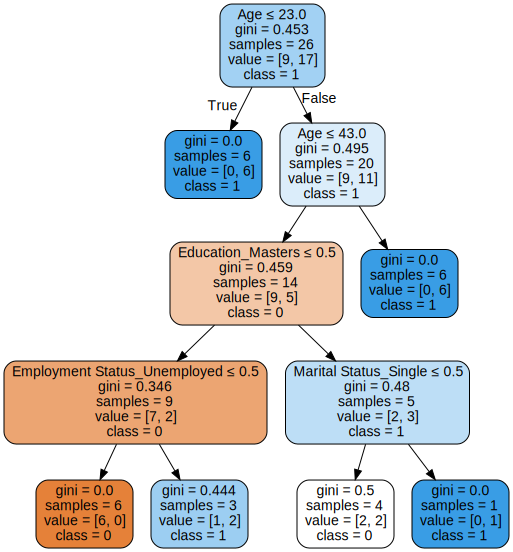

In [ ]:
graph